In [3]:
# Importamos librerías de análisis de datos
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

In [8]:
#Creamos el dataframe a partir del set de datos y les asigno un tipo acorde a las descripciones
df = pd.read_csv('data/train.csv',index_col= 'id', dtype={'titulo':'object','descripcion':'object',\
                                           'tipodepropiedad':'category', 'direccion':'object',\
                                           'ciudad':'category', 'provincia':'category',\
                                           'antiguedad':'float', 'habitaciones':'float',\
                                           'garages':'float','banos':'float',\
                                           'metroscubiertos':'float', 'metrostotales':'float',\
                                           'idzona':'float', 'lat':'float', 'lng':'float',\
                                           'gimnasio':'bool', 'usosmultiples':'bool',\
                                           'piscina':'bool', 'escuelascercanas':'bool',\
                                           'centroscomercialescercanos':'bool',\
                                           'precio':'float'}, parse_dates=['fecha'])
df.dtypes

titulo                                object
descripcion                           object
tipodepropiedad                     category
direccion                             object
ciudad                              category
provincia                           category
antiguedad                           float64
habitaciones                         float64
garages                              float64
banos                                float64
metroscubiertos                      float64
metrostotales                        float64
idzona                               float64
lat                                  float64
lng                                  float64
fecha                         datetime64[ns]
gimnasio                                bool
usosmultiples                           bool
piscina                                 bool
escuelascercanas                        bool
centroscomercialescercanos              bool
precio                               float64
dtype: obj

Dado que sabemos que las columnas: latitud, longitud tienen principalmente valores nulos, decidimos eliminar estas. 

In [66]:
df.head()

,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
id,,,,,,,,,,,,,,,,,,,,
254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,nan,2.00,1.00,2.00,80.00,80.00,23533.00,2015-08-23,False,False,False,False,False,2273000.00
53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.00,3.00,2.00,2.00,268.00,180.00,24514.00,2013-06-28,False,False,False,True,True,3600000.00
247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.00,3.00,2.00,2.00,144.00,166.00,48551.00,2015-10-17,False,False,False,False,False,1200000.00
209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.00,2.00,1.00,1.00,63.00,67.00,53666.00,2012-03-09,False,False,False,True,True,650000.00
185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.00,2.00,1.00,1.00,95.00,95.00,47835.00,2016-06-07,False,False,False,False,False,1150000.00


In [49]:
#Eliminamos columnas latitud y longitud
df = df.drop(['lat'],axis=1)
df= df.drop(['lng'],axis=1)
df.describe()

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
count,196445.00,217529.00,202235.00,213779.00,222600.00,188533.00,211379.00,240000.00,240000.00,240000.00,240000.00,240000.00,240000.00
mean,8.12,2.90,1.55,2.13,174.02,176.77,2423467.82,0.06,0.06,0.09,0.44,0.40,2530838.35
std,9.55,0.90,0.85,0.91,98.15,94.43,10567938.36,0.24,0.23,0.28,0.50,0.49,2152551.80
min,0.00,1.00,0.00,1.00,15.00,15.00,22.00,0.00,0.00,0.00,0.00,0.00,310000.00
25%,0.00,2.00,1.00,1.00,90.00,102.00,24890.00,0.00,0.00,0.00,0.00,0.00,952772.50
50%,5.00,3.00,2.00,2.00,153.00,155.00,56383.00,0.00,0.00,0.00,0.00,0.00,1850000.00
75%,10.00,3.00,2.00,3.00,240.00,238.00,87838.00,0.00,0.00,0.00,1.00,1.00,3390000.00
max,80.00,10.00,3.00,4.00,439.00,439.00,50003999.00,1.00,1.00,1.00,1.00,1.00,12525000.00


In [90]:
nulls = pd.DataFrame(df.isnull().sum().sort_values(), columns=['nulls'])
nulls['porcentaje'] = round(100*nulls['nulls'] / len(df), 2)
nulls

,nulls,porcentaje
precio,0,0.00
escuelascercanas,0,0.00
piscina,0,0.00
usosmultiples,0,0.00
gimnasio,0,0.00
centroscomercialescercanos,0,0.00
fecha,0,0.00
tipodepropiedad,46,0.02
provincia,155,0.06
ciudad,372,0.16


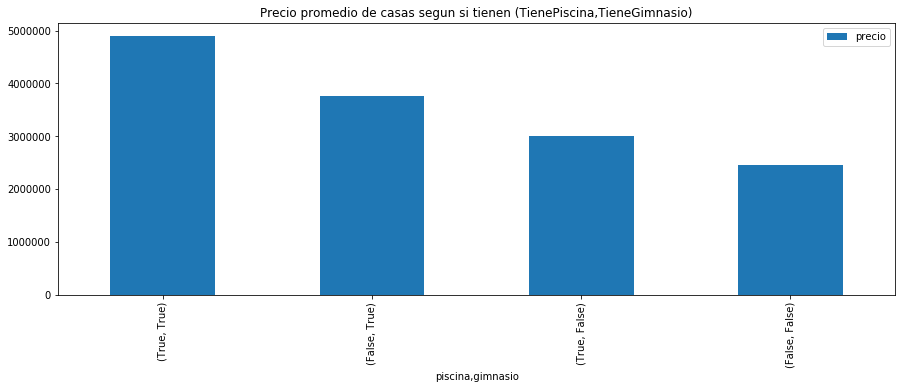

In [54]:
df.loc[df['tipodepropiedad'] == 'Apartamento'].groupby(['piscina','gimnasio']).agg({'precio':'mean'})\
    .sort_values('precio',ascending= False)\
        .plot(kind='bar',figsize=(15,5),color=sns.color_palette(),title= 'Precio promedio de casas segun si tienen (TienePiscina,TieneGimnasio)');

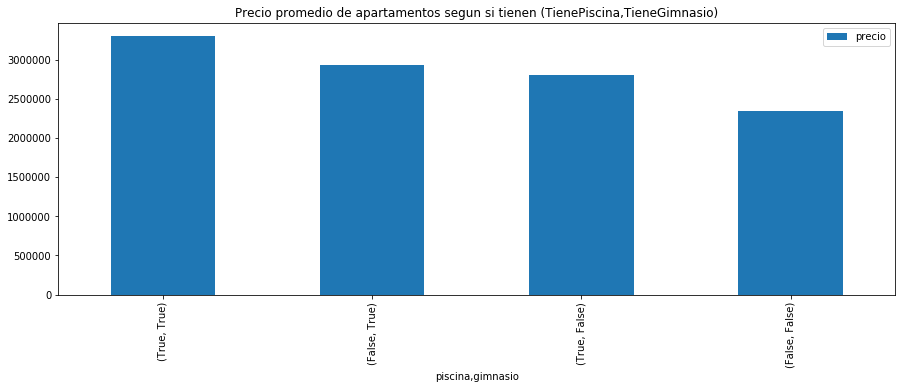

In [55]:
df.loc[df['tipodepropiedad'] == 'Casa'].groupby(['piscina','gimnasio']).agg({'precio':'mean'})\
    .sort_values('precio',ascending= False)\
        .plot(kind='bar',figsize=(15,5),color=sns.color_palette(),title= 'Precio promedio de apartamentos segun si tienen (TienePiscina,TieneGimnasio)');

Fijarse que sigue la misma tendencia que el grafico anterior que estaba hecho para casas

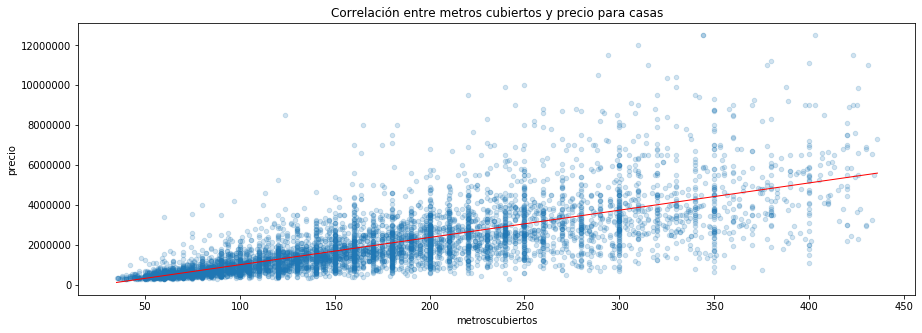

In [59]:
# Correlacion entre precio y metros cubiertos: descripción gráfica
column = 'metroscubiertos'

# Scatter plot
df1 = df.loc[df['tipodepropiedad'] == 'Casa']
df1_sample = df1.sample(frac=0.2).copy().dropna().sort_values(column)
df1_sample.sort_values(column).plot.scatter(x=column, y='precio',alpha=.2,figsize=(15, 5), title="Correlación entre metros cubiertos y precio para casas")
plt.ticklabel_format(style = 'plain')

# Best-fit lineal
x = df1_sample[column]
y = df1_sample['precio']
f = np.poly1d(np.polyfit(x, y, deg=1))  
plt.plot(x.unique(), f(x.unique()), c='r', linewidth=1);

plt.savefig('CorrelacionMetrosCubiertosPrecioCasas.png',bbox_inches= 'tight')

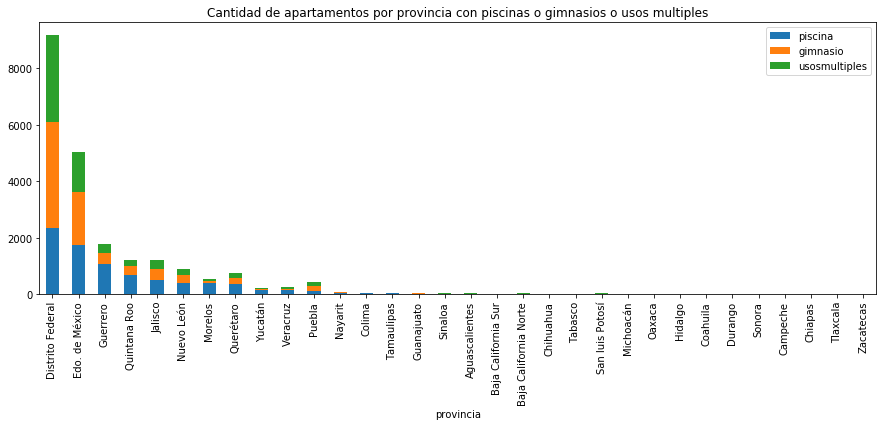

In [53]:
casas = df.loc[df['tipodepropiedad'] == 'Apartamento']
casas.groupby('provincia').agg({'piscina': 'sum','gimnasio' : 'sum','usosmultiples':'sum'})\
    .sort_values('piscina',ascending= False)\
             .plot(kind='bar',figsize=(15,5),stacked = True,title= 'Cantidad de apartamentos por provincia con piscinas o gimnasios o usos multiples');

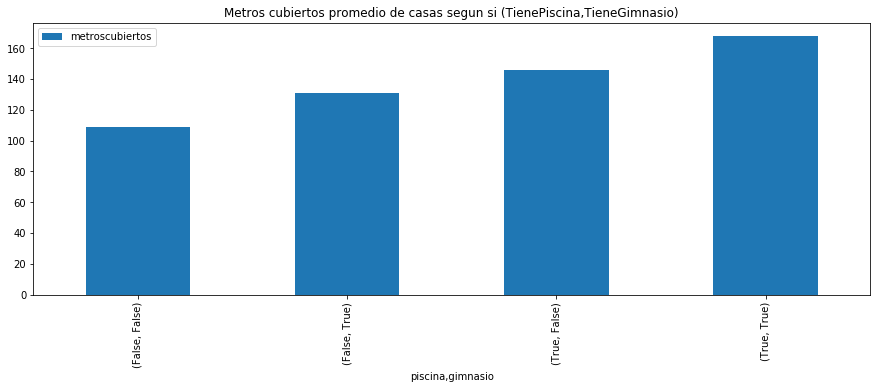

In [56]:
casas.groupby(['piscina','gimnasio']).agg({'metroscubiertos':'mean'})\
    .sort_values('metroscubiertos')\
         .plot(kind='bar',figsize=(15,5),title= 'Metros cubiertos promedio de casas segun si (TienePiscina,TieneGimnasio)');

En el grafico que estaba arriba, esperaba ver un crecimiento del precio a medida que se le agregaban "features" a las casas. En rasgos generales pareciera ser cierto.

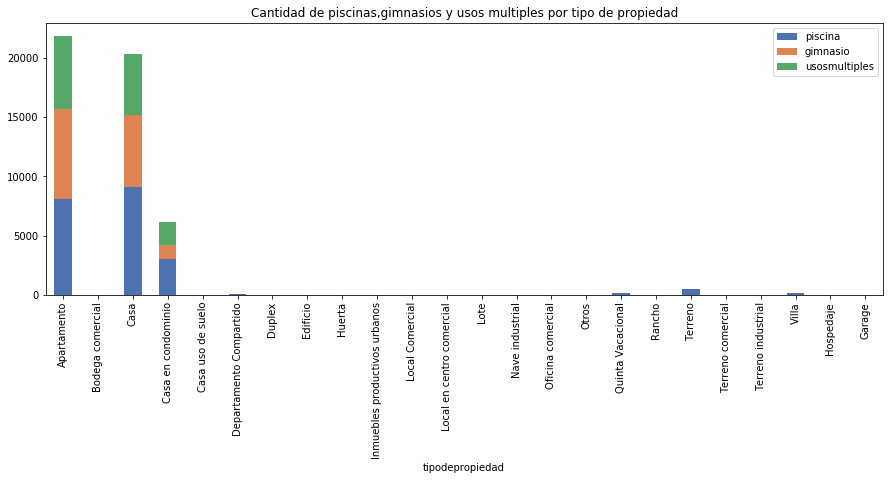

In [50]:
tipos_de_propiedad = df.groupby('tipodepropiedad')
tipos_de_propiedad.agg({'piscina':sum,'gimnasio':'sum','usosmultiples':'sum'})\
    .plot(kind='bar',color=sns.color_palette(palette= 'deep'),stacked=True,figsize=(15,5),title= 'Cantidad de piscinas,gimnasios y usos multiples por tipo de propiedad');